In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df = pd.read_excel(r'/content/Final_Data_Full.xlsx')

In [ ]:
df.head()

id                 date  ls_number  \
0  17355013  1999-11-29T00:00:00         13   
1  17355013  1999-11-29T00:00:00         13   
2  17354913  1999-11-30T00:00:00         13   
3  17354713  1999-11-30T00:00:00         13   
4  17354813  1999-11-30T00:00:00         13   

                                   ministry question_type  \
0                         Surface Transport       Starred   
1                         Surface Transport       Starred   
2                 Chemicals and Fertilizers       Starred   
3                         Urban Development       Starred   
4  Urban Employment and Poverty Alleviation       Starred   

                                       question_text  \
0  (a) whether most of the National Highways in t...   
1  (a) whether most of the National Highways in t...   
2  (a) whether the cost of production of urea has...   
3  (a) the details of expenditure likely to be in...   
4  (a) whether the Government have allowed Foreig...   

                                         answer_text  \
0  MINISTER OF SURFACE TRANSPORT (SHRI RAJNATH SI...   
1  MINISTER OF SURFACE TRANSPORT (SHRI RAJNATH SI...   
2  THE MINISTER OF CHEMICALS AND FERTILIZERS (SHR...   
3  MINISTER FOR URBAN DEVELOPMENT ( SHRI JAGMOHAN...   
4  MINISTER FOR URBAN EMPLOYMENT AND POVERTY ALLE...   

                     member  party           state constituency  \
0       RAM TAHAL CHOUDHARY    BJP           Bihar       Ranchi   
1     ASHOK NAMDEORAO MOHOL    NCP     Maharashtra         Khed   
2  DHIKALE UTTAMRAO NATHUJI    SHS     Maharashtra       Nashik   
3      VIJAY KUMAR MALHOTRA    BJP           Delhi  South delhi   
4  SULTAN SALAHUDDIN OWAISI  AIMIM  Andhra Pradesh    Hyderabad   

  constituency_type gender                                     subject  
0               GEN   Male  DILAPIDATED CONDITION OF NATIONAL HIGHWAYS  
1               GEN   Male  DILAPIDATED CONDITION OF NATIONAL HIGHWAYS  
2               GEN   Male                       PRODUCTION OF UREA. .  
3               GEN   Male                    DELHI METRO RAIL PROJECT  
4               GEN   Male                       FDI IN HOUSING SECTOR

In [ ]:
df.shape

(288664, 14)

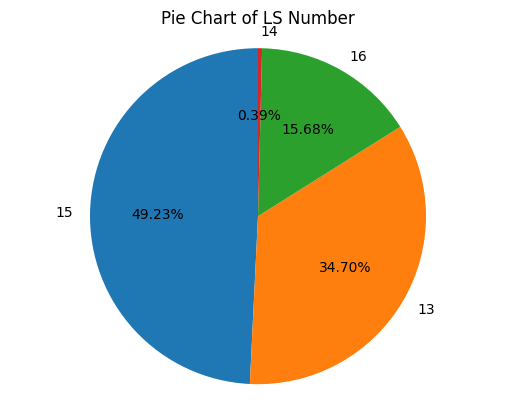

In [ ]:
ls_counts = df['ls_number'].value_counts()
plt.pie(ls_counts, labels=ls_counts.index, autopct='%.2f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Chart of LS Number')
plt.show()

**Which ministries receive the most questions**

Government ministries are most frequently queried

Graph Used : Bar Graph

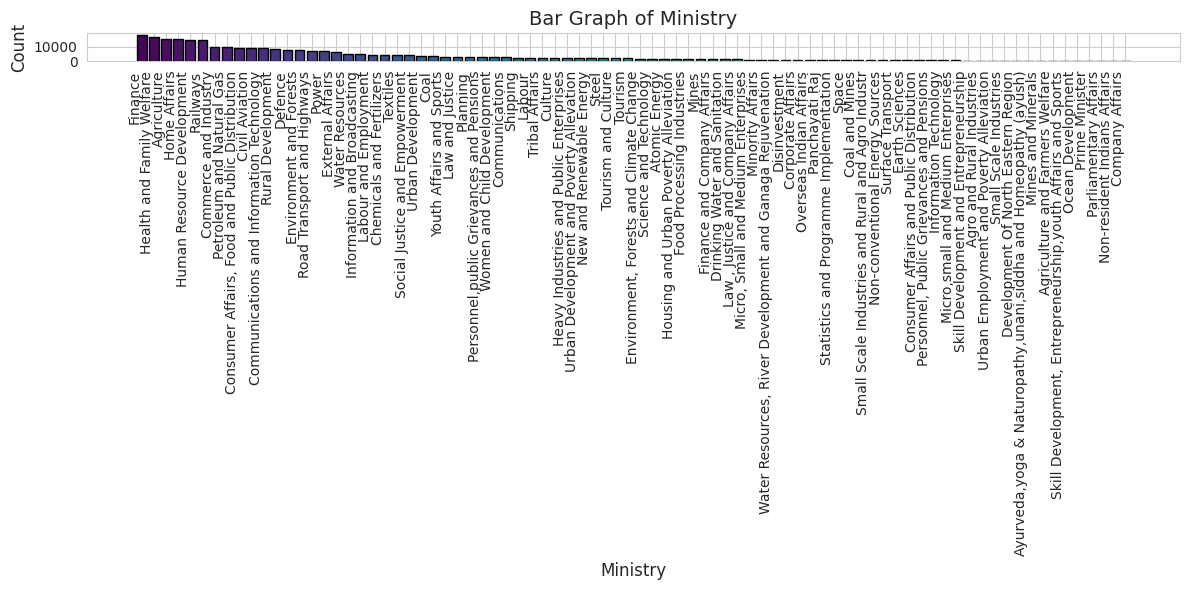

In [ ]:
sns.set_style("whitegrid")
ministry_counts = df['ministry'].value_counts()
plt.figure(figsize=(12, 6))
bars = plt.bar(ministry_counts.index, ministry_counts.values, color=sns.color_palette("viridis", len(ministry_counts)), edgecolor='black')
plt.xlabel('Ministry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bar Graph of Ministry', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**10 Most Frequently targeted ministry **

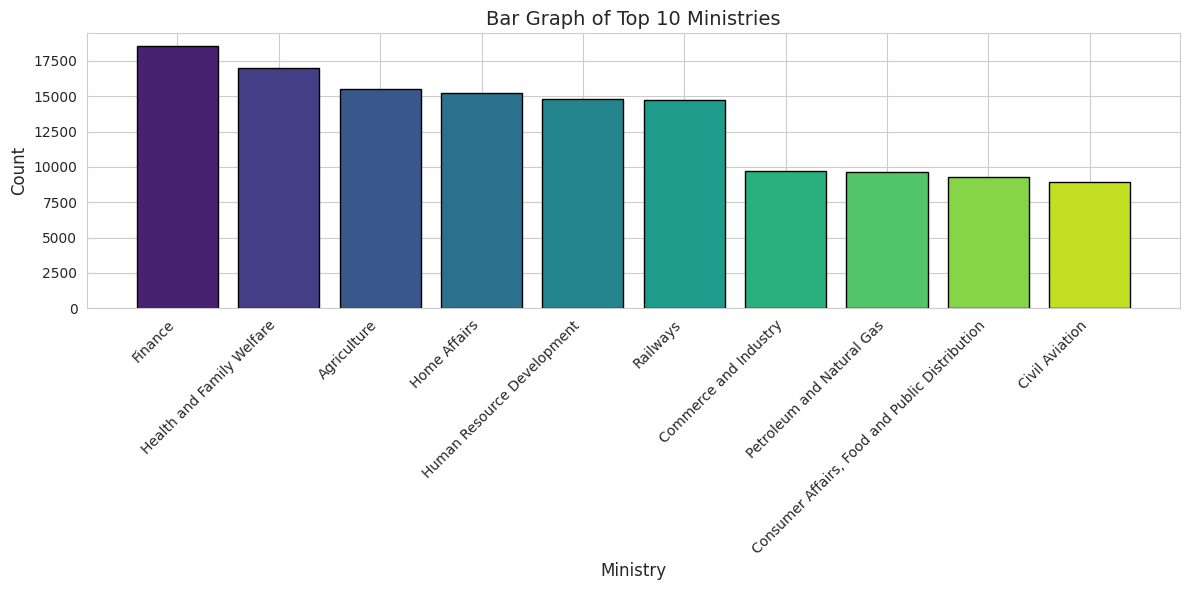

In [ ]:
sns.set_style("whitegrid")
top_10_ministries = df['ministry'].value_counts().head(10)
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_ministries.index, top_10_ministries.values, color=sns.color_palette("viridis", len(top_10_ministries)), edgecolor='black')
plt.xlabel('Ministry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bar Graph of Top 10 Ministries', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**10 Least Targeted Ministry **

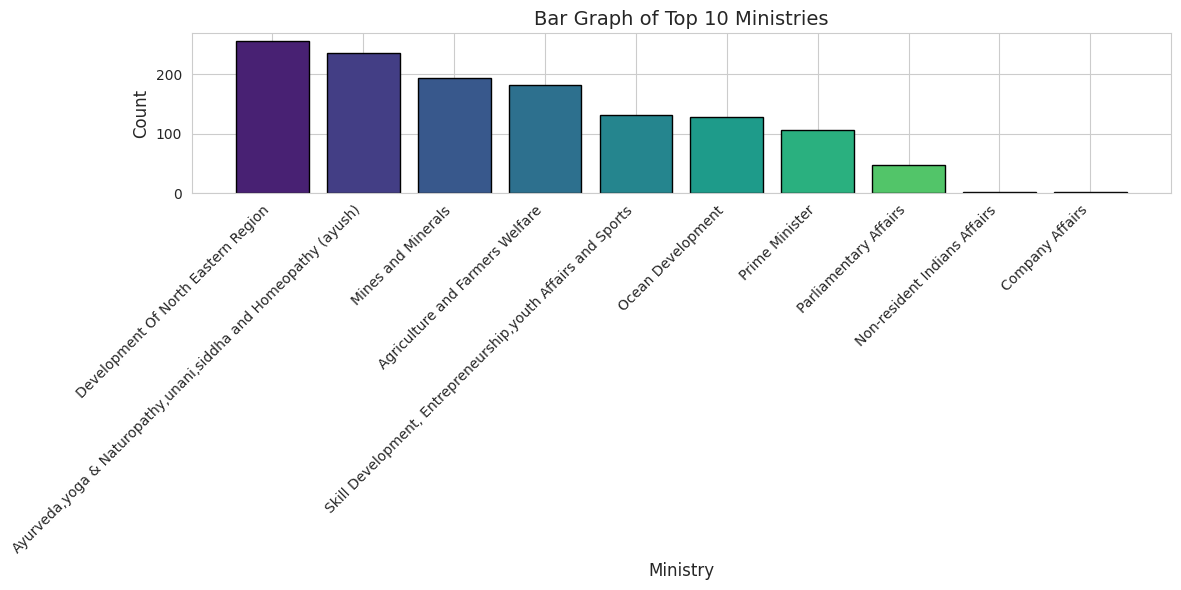

In [ ]:
sns.set_style("whitegrid")
top_10_ministries = df['ministry'].value_counts().tail(10)
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_ministries.index, top_10_ministries.values, color=sns.color_palette("viridis", len(top_10_ministries)), edgecolor='black')
plt.xlabel('Ministry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bar Graph of Top 10 Ministries', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**Word Cloud**

Analysis for recuuring themes and topics that dominate the questions raised in the lok sabha

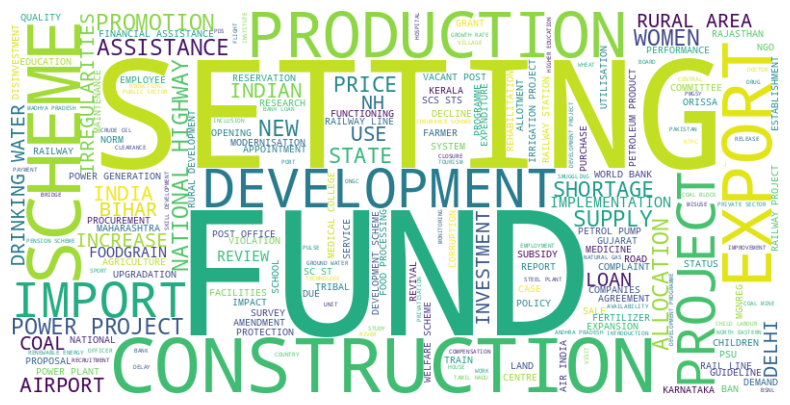

In [ ]:
text = ' '.join(df['subject'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<ipython-input-15-c908430f1c57>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.groupby(pd.Grouper(key='date', freq='M'))['subject'].count()


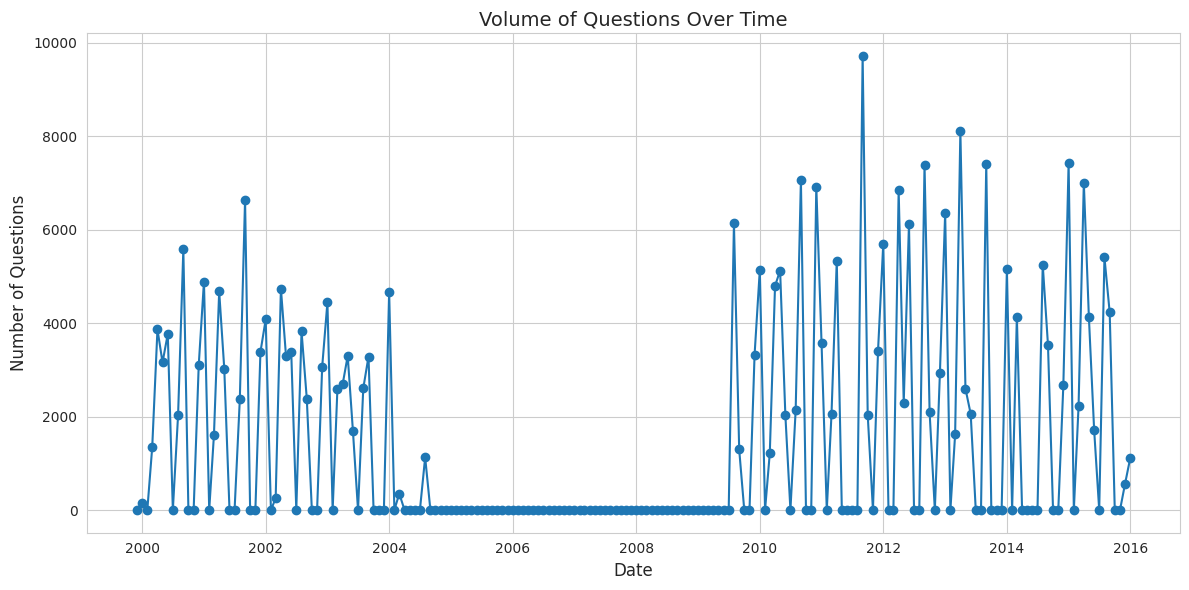

In [ ]:
df['date'] = pd.to_datetime(df['date'])
monthly_counts = df.groupby(pd.Grouper(key='date', freq='M'))['subject'].count()
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.title('Volume of Questions Over Time', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

def most_questions_by_member(df):
  member_counts = df.groupby(['ls_number', 'member'])['subject'].count().reset_index()

  most_questions = member_counts.loc[member_counts.groupby('ls_number')['subject'].idxmax()]

  return most_questions[['ls_number', 'member', 'subject']]

most_questions_df = most_questions_by_member(df)


print(most_questions_df)

      ls_number                      member  subject
455          13     UMMAREDDY VENKATESWARLU     1304
602          14     RAYAPATI  SAMBASIVA RAO       24
656          15      ADSUL ANANDRAO VITHOBA     1252
1181         16  ADHALRAO SHIVAJI DATTATREY      391


In [ ]:

spc = df.groupby(['ls_number', 'party'])['subject'].count().reset_index()
most_questions_session = spc.loc[spc.groupby('ls_number')['subject'].idxmax()]
print (most_questions_session[['ls_number', 'party', 'subject']])



     ls_number party  subject
19          13   INC    25888
52          14   BJP      341
93          15   INC    44756
164         16   BJP    19305


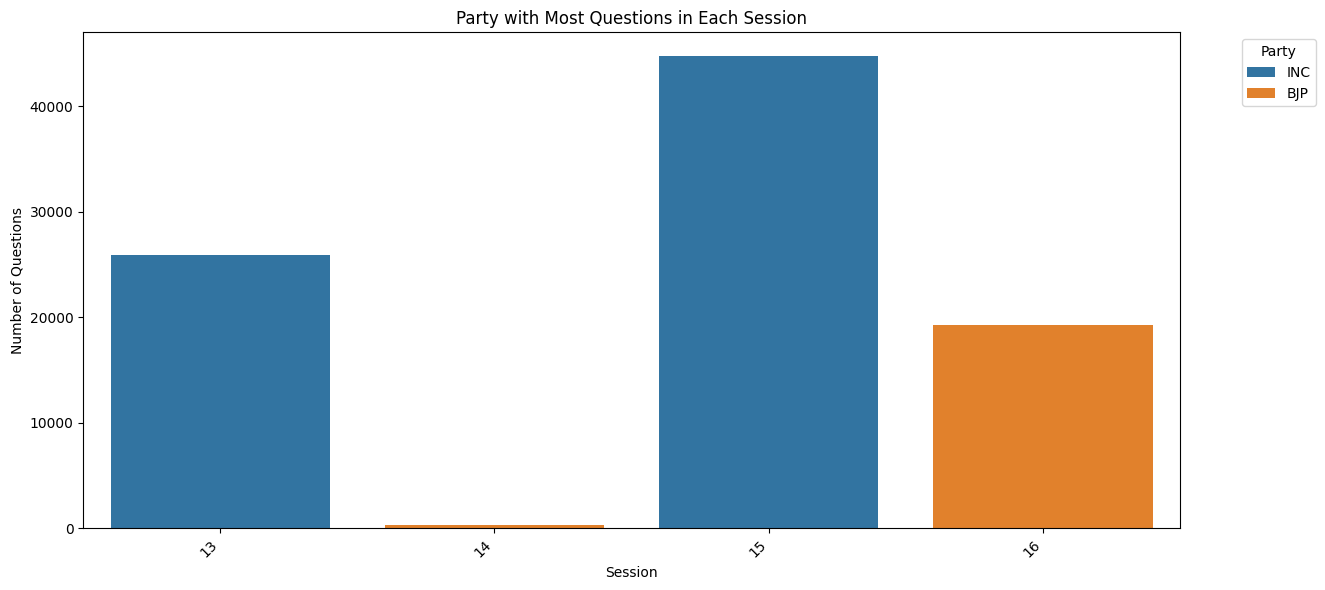

In [ ]:
most_questions_session_df= (most_questions_session[['ls_number', 'party', 'subject']])
plt.figure(figsize=(12, 6))
sns.barplot(x='ls_number', y='subject', hue='party', data=most_questions_session_df, dodge=False)
plt.xlabel('Session')
plt.ylabel('Number of Questions')
plt.title('Party with Most Questions in Each Session')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

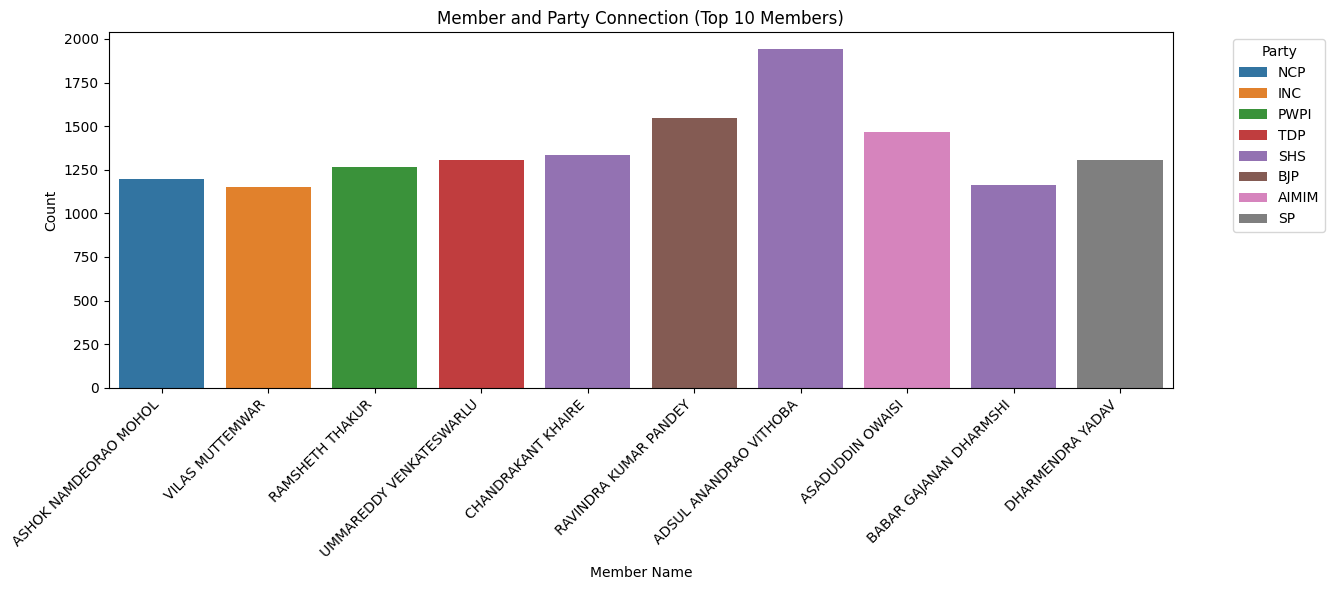

In [ ]:

top_n_members = df['member'].value_counts().head(10).index

filtered_df = df[df['member'].isin(top_n_members)]

plt.figure(figsize=(12, 6))
sns.countplot(x='member', hue='party', data=filtered_df)
plt.xlabel('Member Name')
plt.ylabel('Count')
plt.title('Member and Party Connection (Top 10 Members)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
member_party_crosstab = pd.crosstab(df['member'], df['party'])


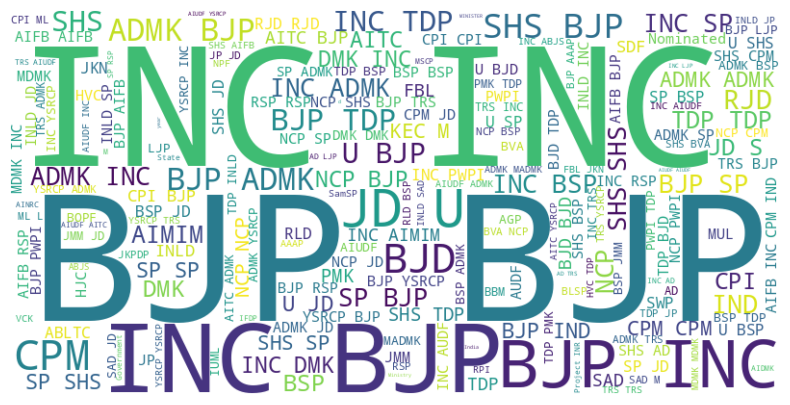

In [ ]:
text = ' '.join(df['party'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

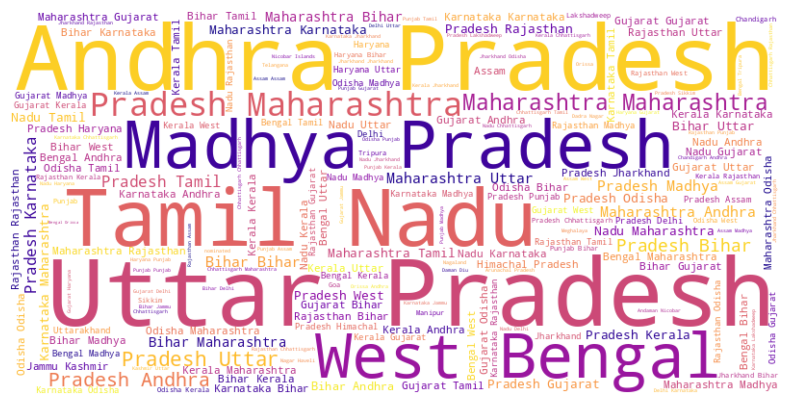

In [ ]:
import matplotlib.cm as cm

text = ' '.join(df['state'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap=cm.plasma,
                      stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:

def gender_ratio_per_session(df):

    gender_counts = df.groupby(['ls_number', 'gender'])['member'].count().reset_index()

    gender_pivot = gender_counts.pivot(index='ls_number', columns='gender', values='member').fillna(0)

    gender_pivot['gender_ratio'] = gender_pivot['Male'] / (gender_pivot['Male'] + gender_pivot['Female'])

    return gender_pivot[['Male', 'Female', 'gender_ratio']]

gender_ratio_df = gender_ratio_per_session(df)

print(gender_ratio_df)

gender         Male   Female  gender_ratio
ls_number                                 
13          93355.0   6816.0      0.931956
14           1073.0     54.0      0.952085
15         129807.0  12263.0      0.913683
16          40259.0   4905.0      0.891396


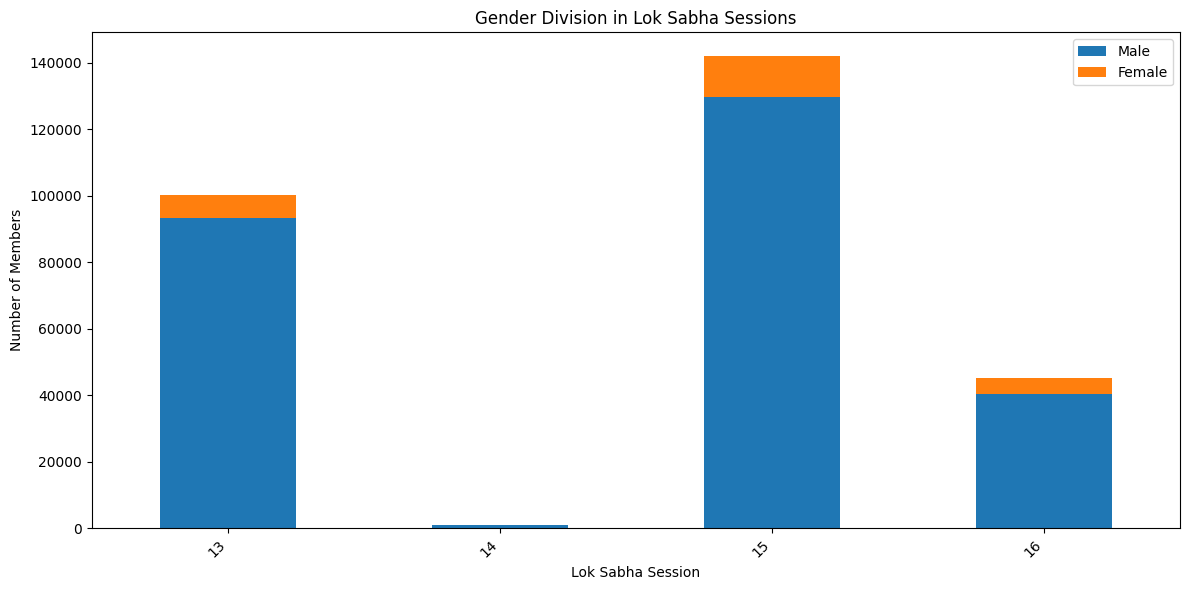

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


gender_ratio_df[['Male', 'Female']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Gender Division in Lok Sabha Sessions')
plt.xlabel('Lok Sabha Session')
plt.ylabel('Number of Members')
plt.xticks(rotation=45, ha='right')
plt.legend(['Male', 'Female'])
plt.tight_layout()
plt.show()

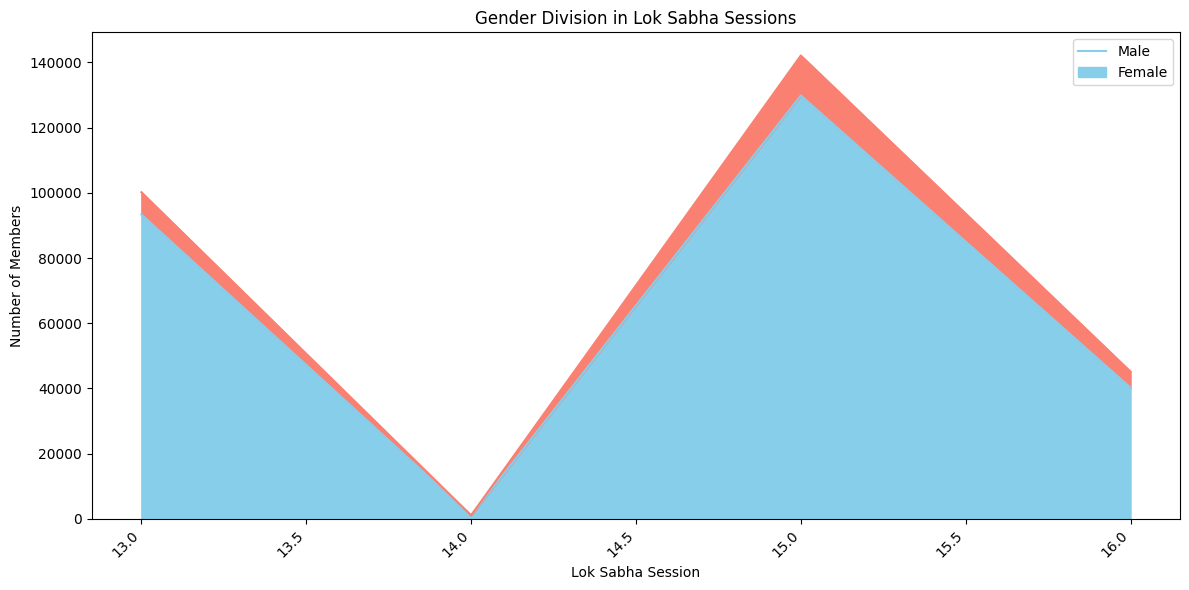

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


gender_ratio_df[['Male', 'Female']].plot(kind='area', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Gender Division in Lok Sabha Sessions')
plt.xlabel('Lok Sabha Session')
plt.ylabel('Number of Members')
plt.xticks(rotation=45, ha='right')
plt.legend(['Male', 'Female'])
plt.tight_layout()
plt.show()

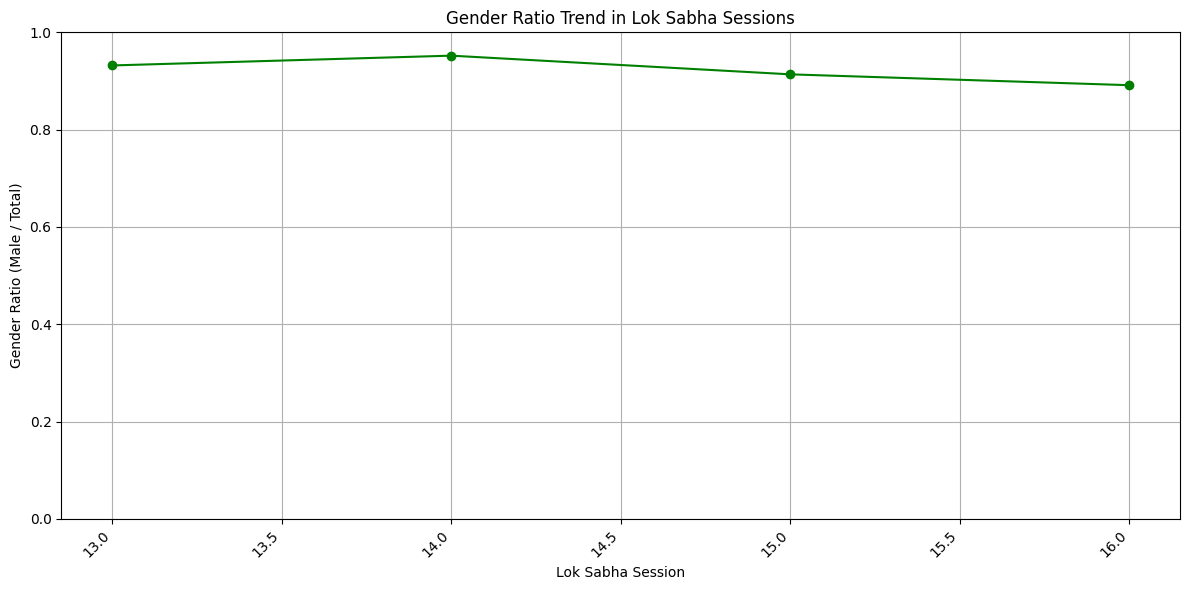

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(12, 6))
plt.plot(gender_ratio_df.index, gender_ratio_df['gender_ratio'], marker='o', linestyle='-', color='green')
plt.title('Gender Ratio Trend in Lok Sabha Sessions')
plt.xlabel('Lok Sabha Session')
plt.ylabel('Gender Ratio (Male / Total)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

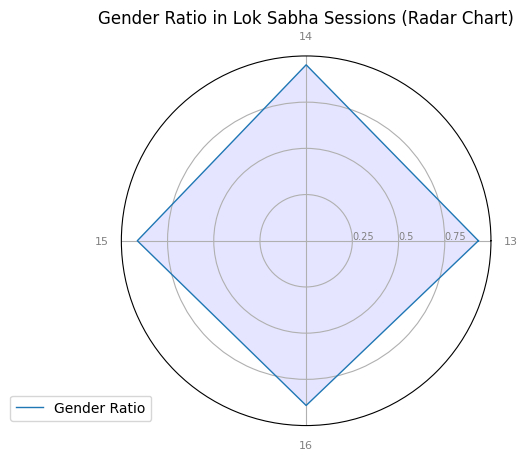

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

categories = gender_ratio_df.index.astype(str).tolist()
values = gender_ratio_df['gender_ratio'].values.tolist()

N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)

ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=7)
plt.ylim(0, 1)

ax.plot(angles, values + values[:1], linewidth=1, linestyle='solid', label="Gender Ratio")
ax.fill(angles, values + values[:1], 'b', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Gender Ratio in Lok Sabha Sessions (Radar Chart)')
plt.show()

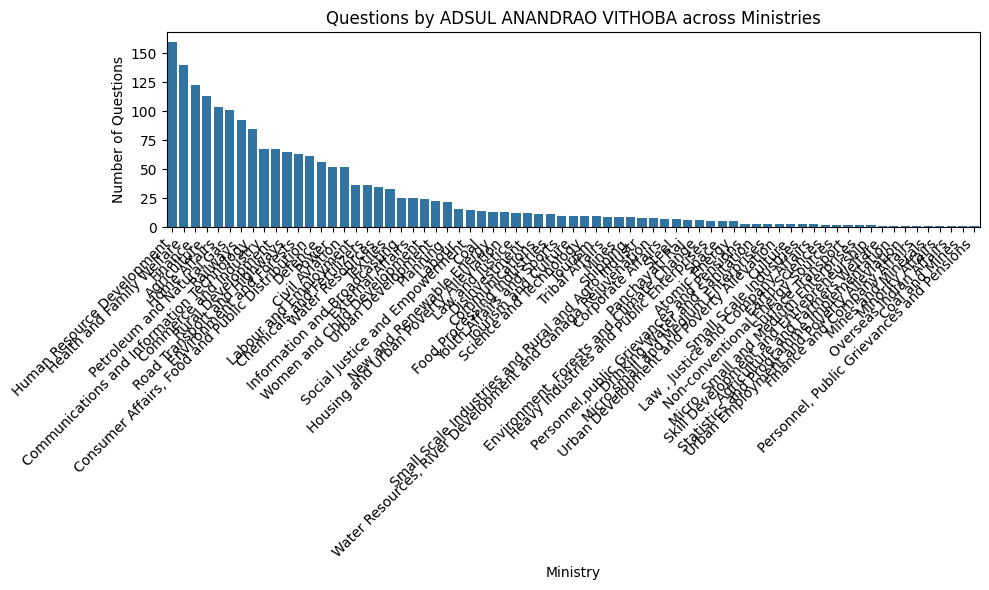

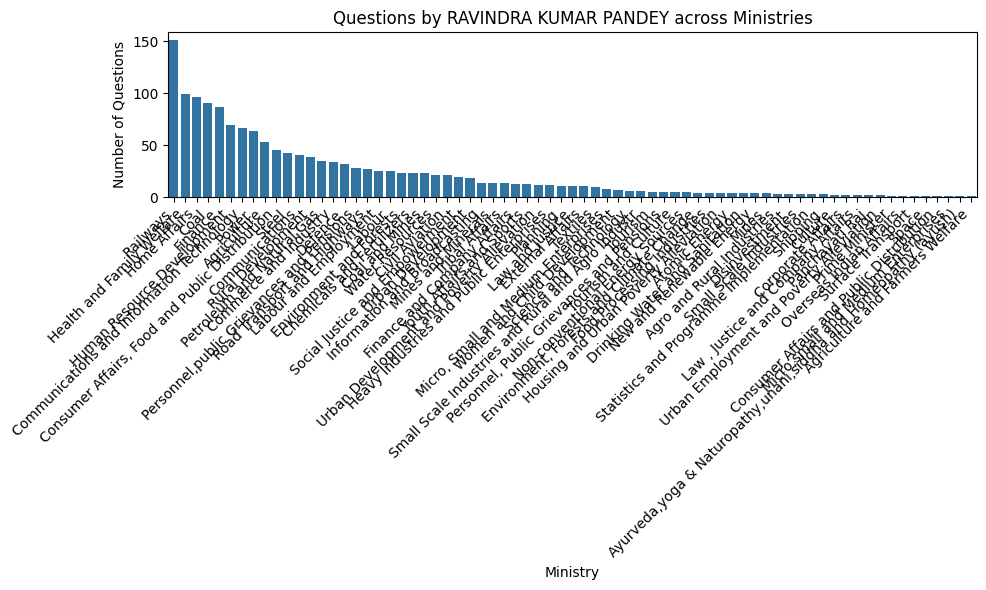

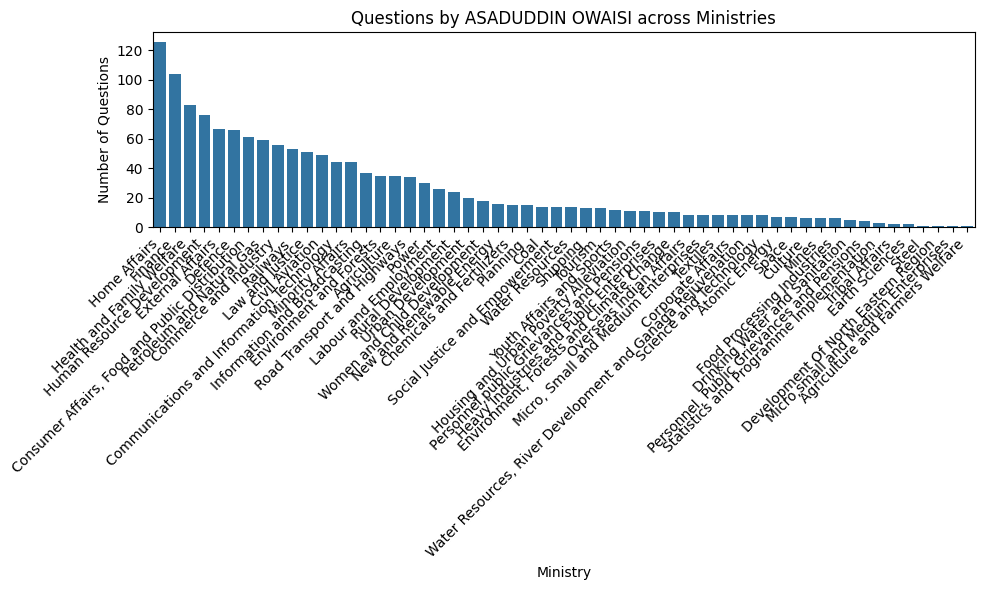

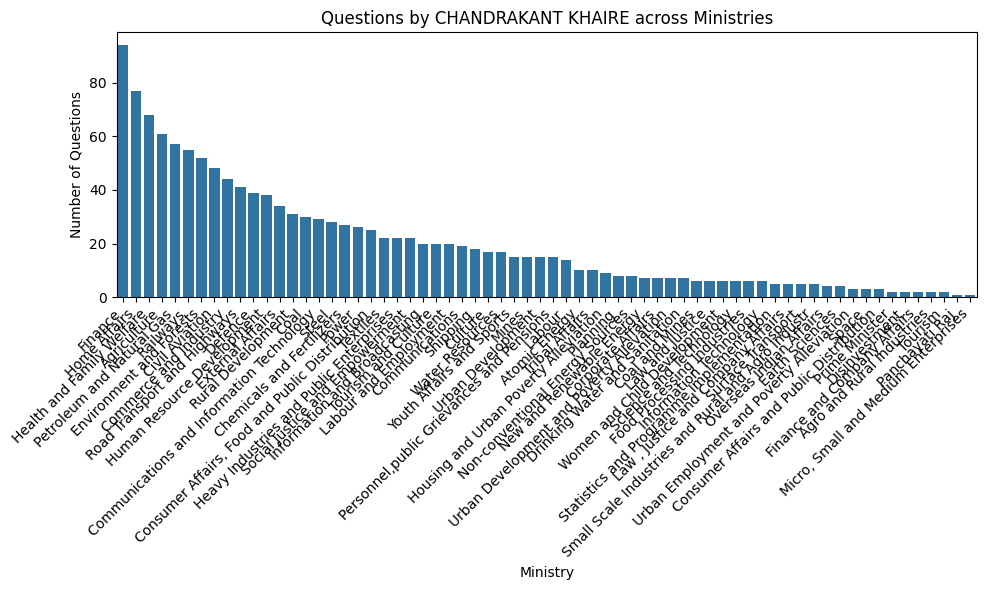

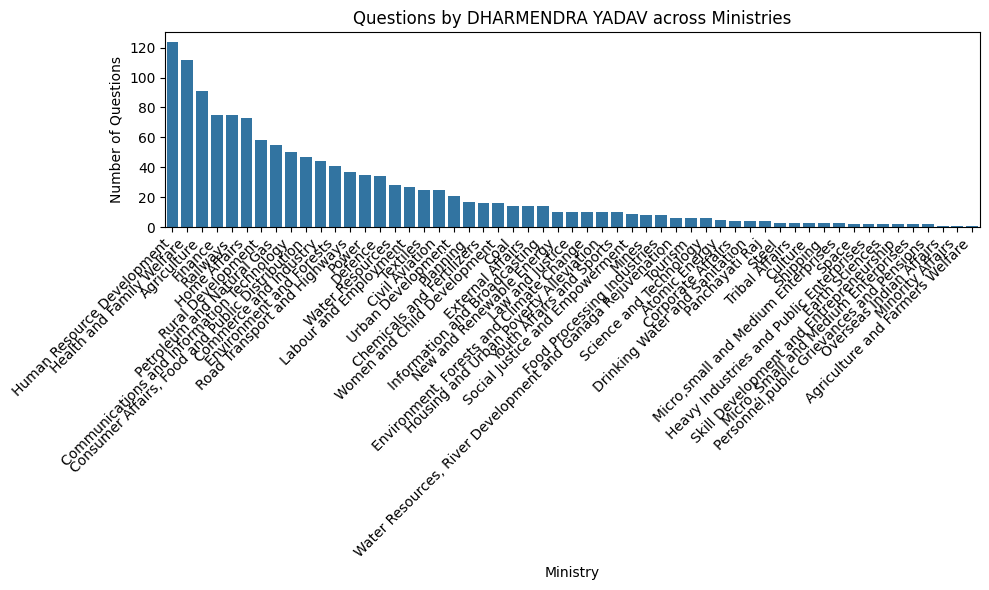

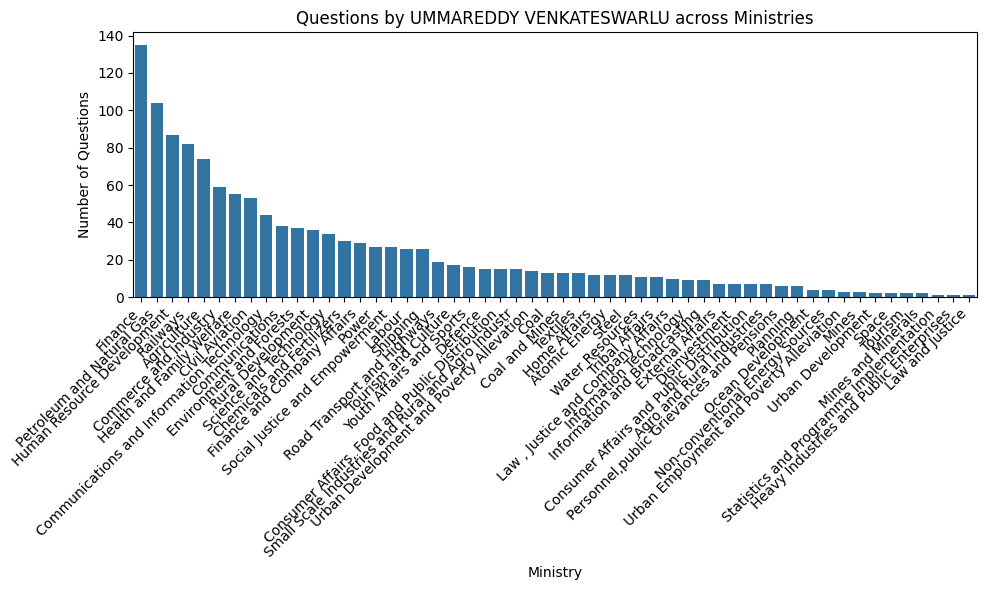

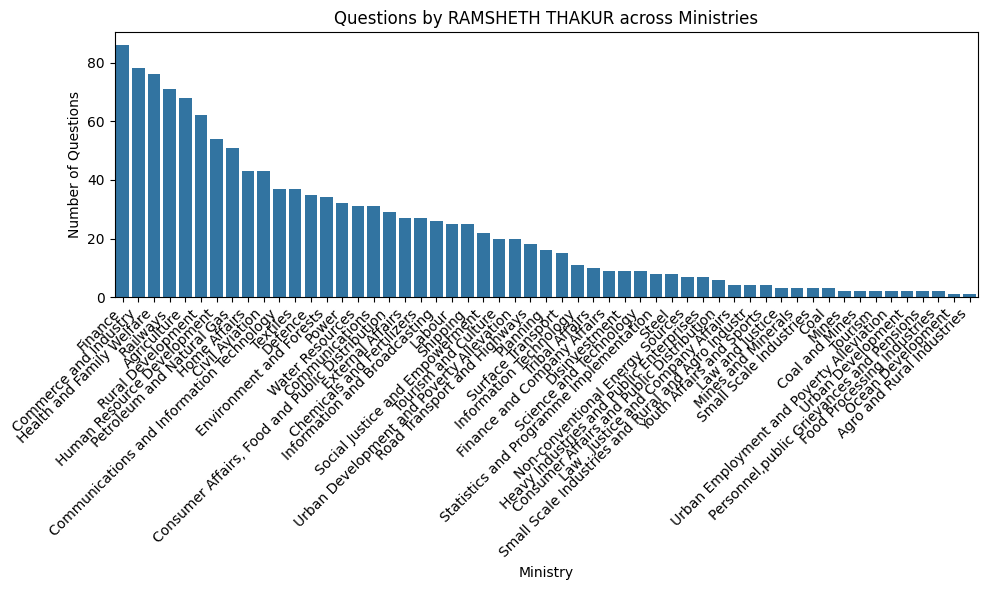

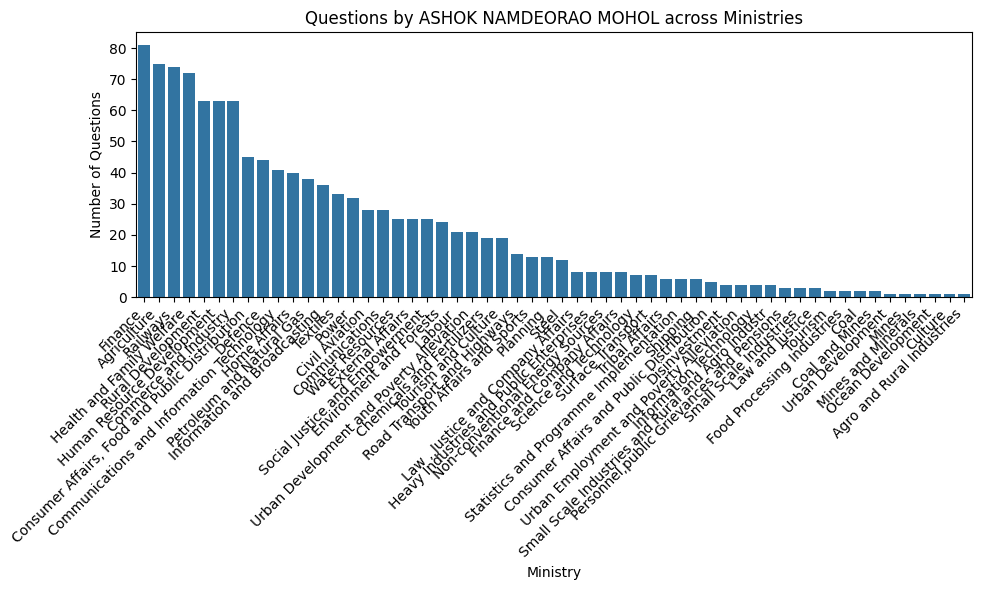

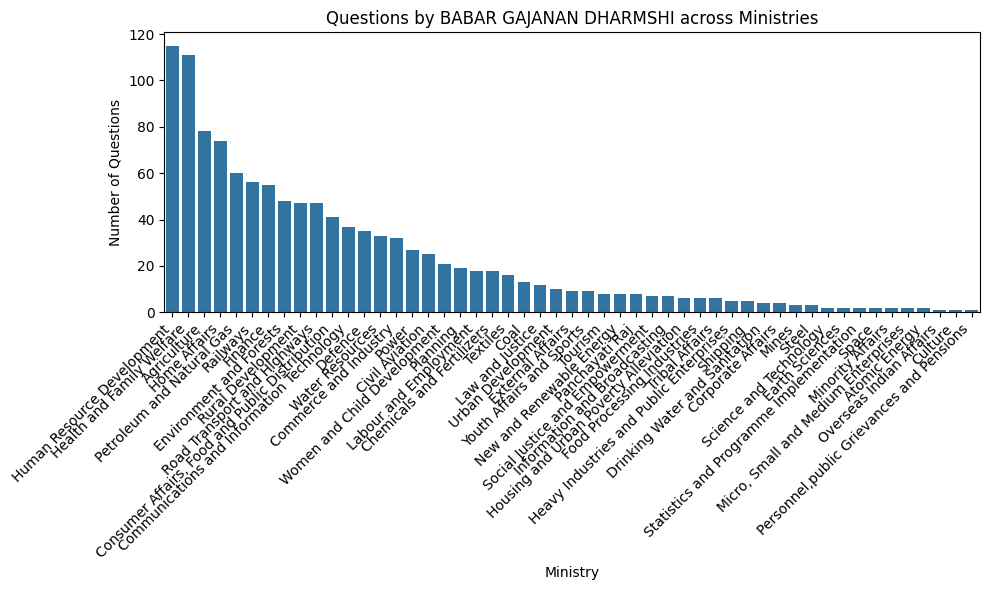

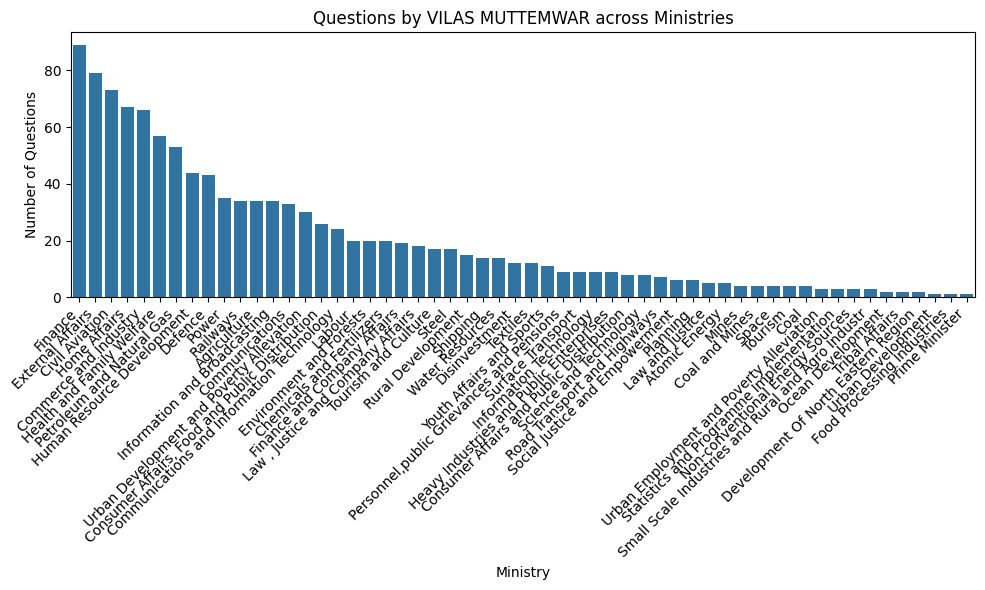

In [ ]:


top_10_ministers = df['member'].value_counts().head(10).index

for minister in top_10_ministers:
    minister_df = df[df['member'] == minister]
    ministry_counts = minister_df['ministry'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=ministry_counts.index, y=ministry_counts.values)
    plt.title(f'Questions by {minister} across Ministries')
    plt.xlabel('Ministry')
    plt.ylabel('Number of Questions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<ipython-input-44-446e4b2a62bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ministry_counts.index, y=ministry_counts.values, palette='plasma')  # Added palette


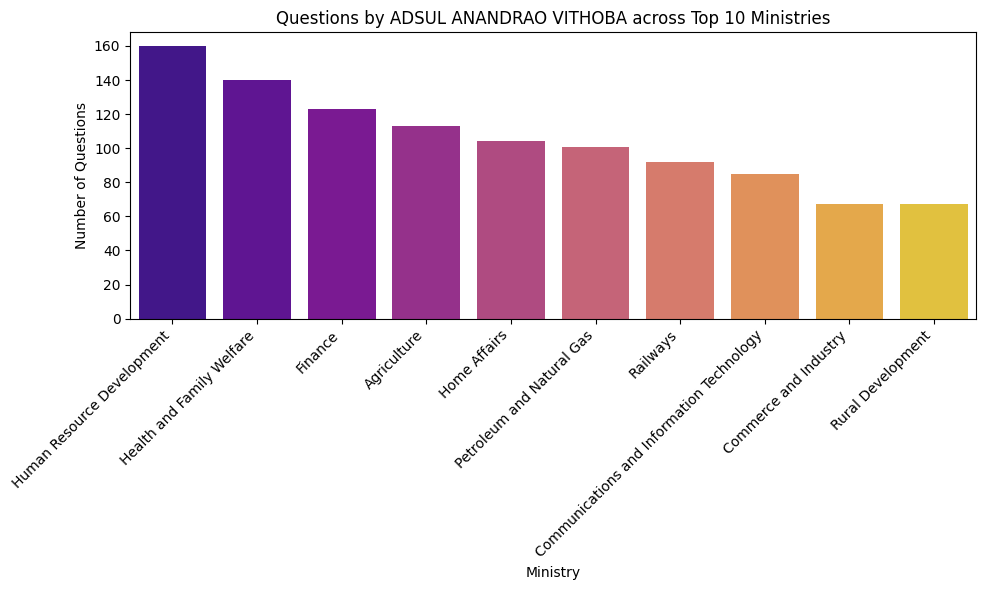

<ipython-input-44-446e4b2a62bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ministry_counts.index, y=ministry_counts.values, palette='plasma')  # Added palette


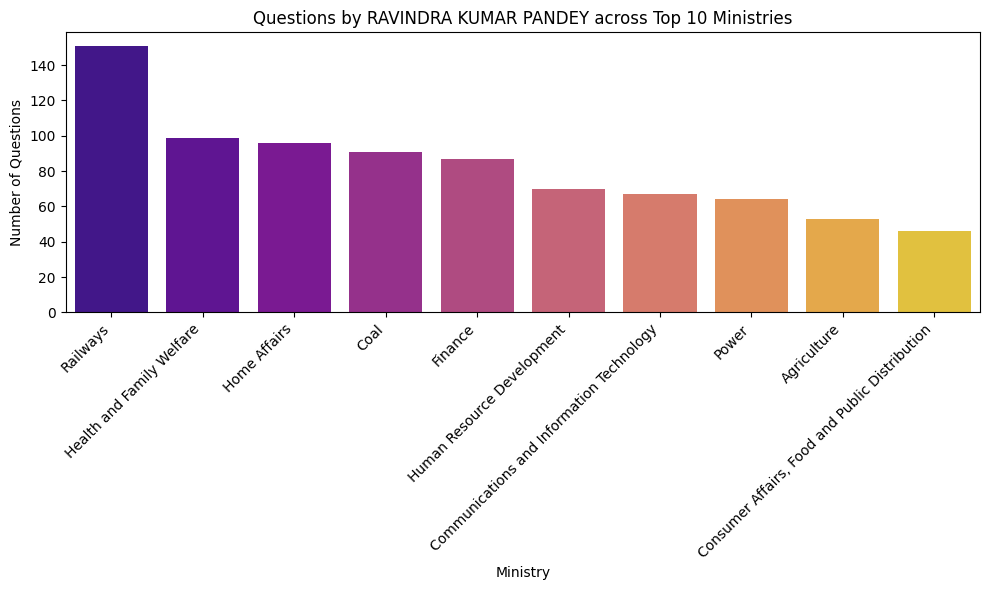

<ipython-input-44-446e4b2a62bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ministry_counts.index, y=ministry_counts.values, palette='plasma')  # Added palette


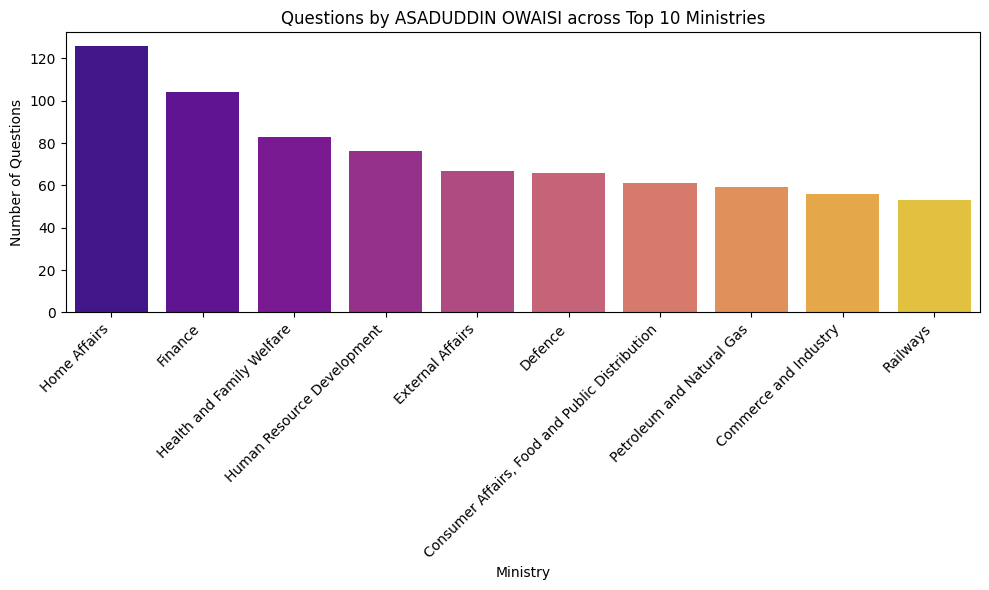

<ipython-input-44-446e4b2a62bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ministry_counts.index, y=ministry_counts.values, palette='plasma')  # Added palette


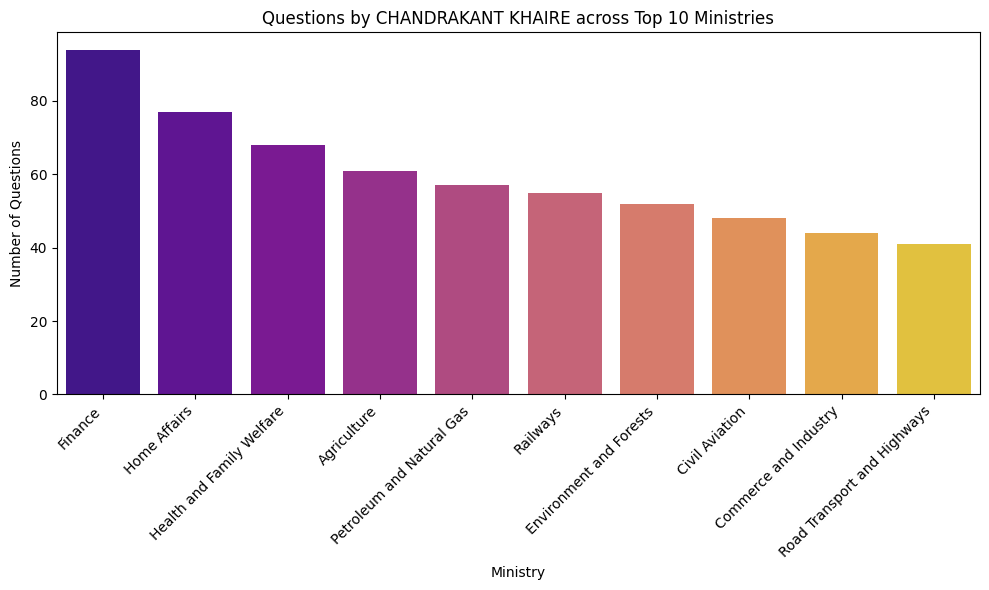

<ipython-input-44-446e4b2a62bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ministry_counts.index, y=ministry_counts.values, palette='plasma')  # Added palette


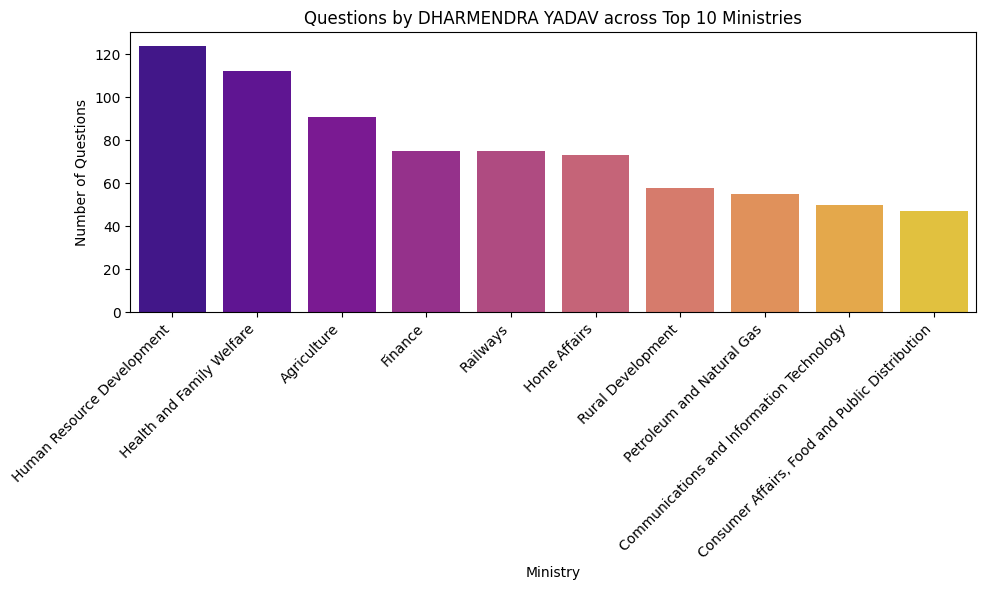

<ipython-input-44-446e4b2a62bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ministry_counts.index, y=ministry_counts.values, palette='plasma')  # Added palette


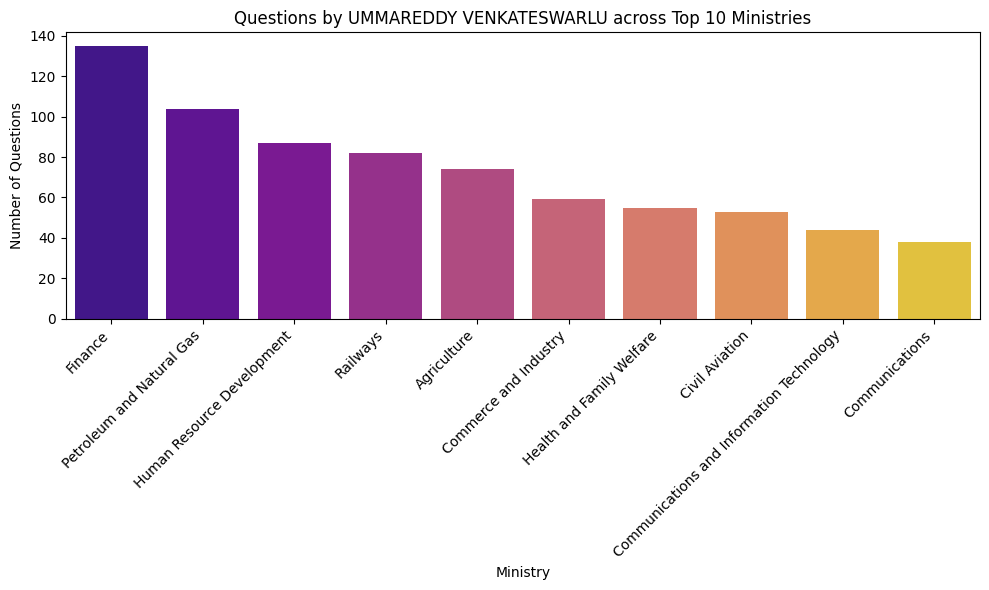

<ipython-input-44-446e4b2a62bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ministry_counts.index, y=ministry_counts.values, palette='plasma')  # Added palette


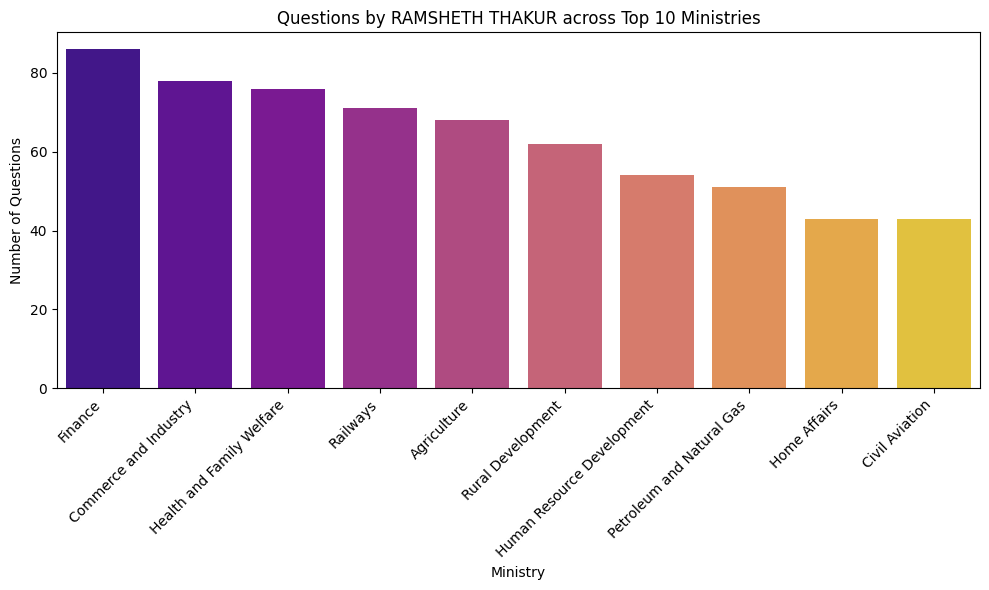

<ipython-input-44-446e4b2a62bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ministry_counts.index, y=ministry_counts.values, palette='plasma')  # Added palette


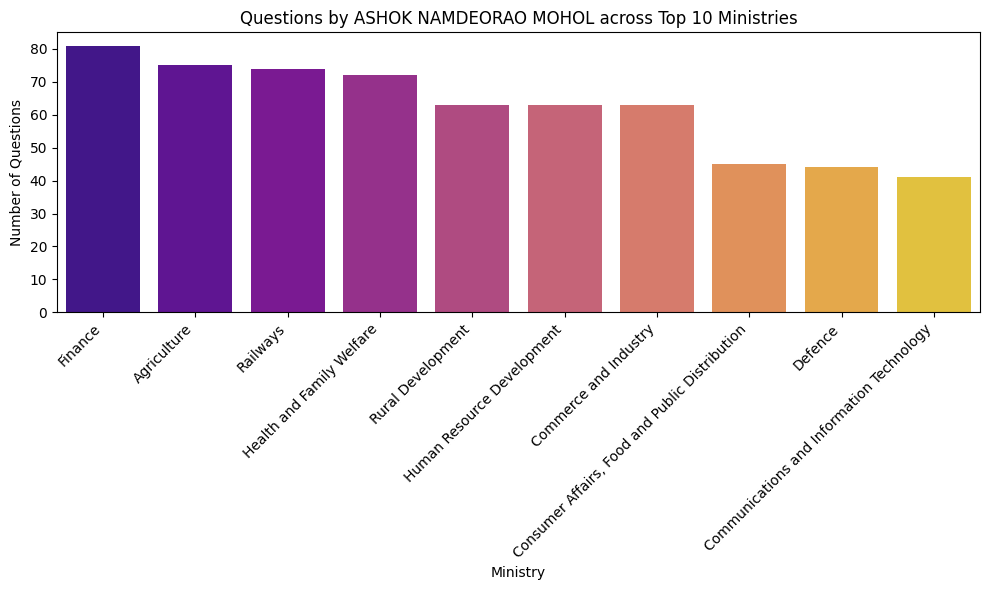

<ipython-input-44-446e4b2a62bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ministry_counts.index, y=ministry_counts.values, palette='plasma')  # Added palette


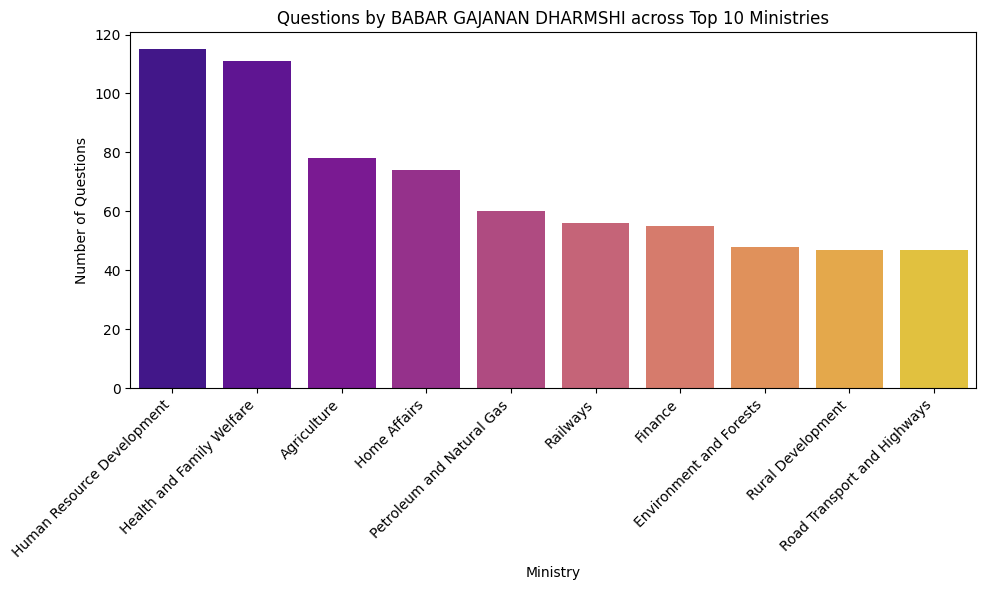

<ipython-input-44-446e4b2a62bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ministry_counts.index, y=ministry_counts.values, palette='plasma')  # Added palette


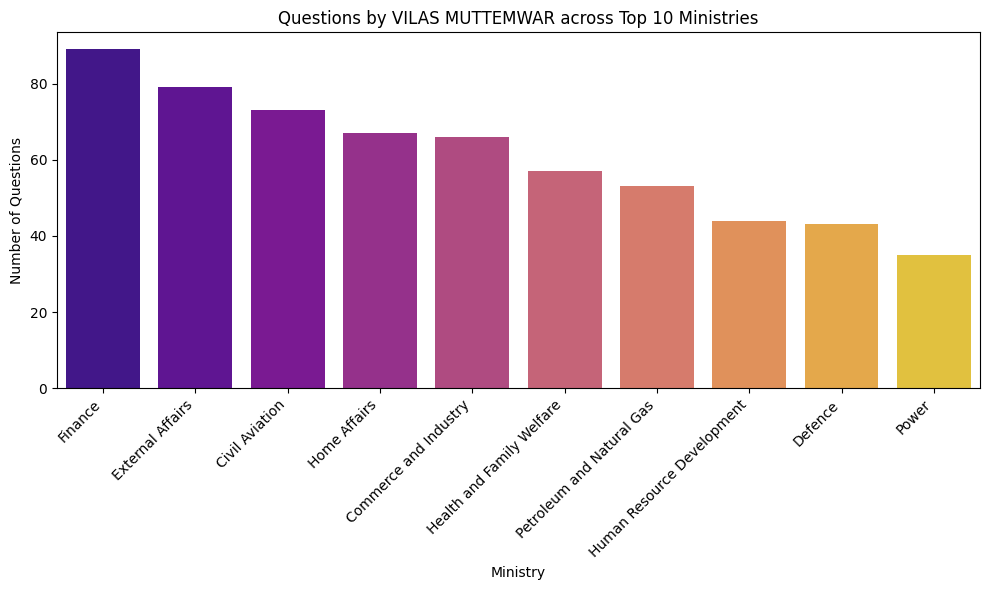

In [ ]:

top_10_ministers = df['member'].value_counts().head(10).index

for minister in top_10_ministers:
    minister_df = df[df['member'] == minister]
    ministry_counts = minister_df['ministry'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=ministry_counts.index, y=ministry_counts.values, palette='plasma')  # Added palette
    plt.title(f'Questions by {minister} across Top 10 Ministries')
    plt.xlabel('Ministry')
    plt.ylabel('Number of Questions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()